### Textbook: 

Carmona, R. (René), Hwang, W.-L., & Torrésani, B. (1998). Practical time-frequency analysis : Gabor and wavelet transforms with an implementation in S. Academic Press.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'signal_1000_posture_4.csv'

dataset = pd.read_csv(file_path)
dat = np.array(dataset)
time_series = dat[705, 2:]

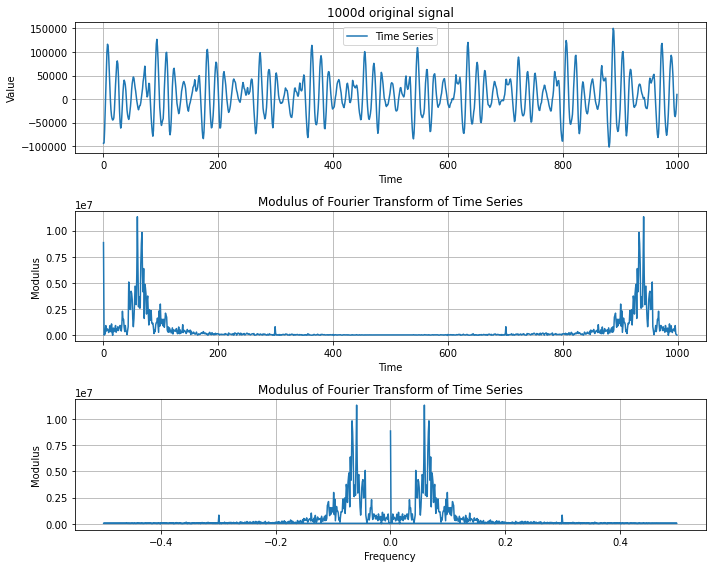

In [13]:
time = np.arange(1000)
# Compute the Fourier transform and its modulus
fourier_transform = np.fft.fft(time_series)
modulus = np.abs(fourier_transform)

# Frequency values corresponding to the Fourier transform
frequencies = np.fft.fftfreq(1000)

# Plot the original time series
plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
plt.plot(time, time_series, label='Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('1000d original signal')
plt.legend()
plt.grid(True)

# Plot the Fourier Transform magnitude
plt.subplot(3, 1, 2)
plt.plot(time, modulus)
plt.xlabel('Time')
plt.ylabel('Modulus')
plt.title('Modulus of Fourier Transform of Time Series')
plt.grid(True)

# Plot the Fourier Transform magnitude on frequency domain
plt.subplot(3, 1, 3)
plt.plot(frequencies, modulus)
plt.xlabel('Frequency')
plt.ylabel('Modulus')
plt.title('Modulus of Fourier Transform of Time Series')
plt.grid(True)

plt.tight_layout()
plt.show()

In [100]:
modulus

array([8.86102700e+06, 3.88685201e+04, 1.01192762e+05, 1.57593882e+05,
       9.45924507e+05, 4.31047560e+05, 6.20193851e+05, 6.24856011e+05,
       5.07009411e+05, 2.87172129e+05, 4.21636217e+05, 9.26283667e+05,
       4.44748144e+05, 3.60196616e+05, 1.10478918e+06, 2.87088381e+05,
       2.17965357e+04, 7.13712638e+05, 3.63858362e+05, 6.41612279e+05,
       6.75178496e+05, 9.52435634e+05, 3.13038442e+05, 6.59450618e+05,
       4.72583758e+05, 8.30824867e+05, 4.76298667e+05, 7.71094930e+05,
       7.73399408e+05, 9.59832216e+05, 5.89857189e+05, 4.24085118e+05,
       1.06340495e+06, 2.31411285e+06, 1.46144175e+06, 1.53633848e+06,
       7.78461275e+05, 3.72077113e+05, 9.53716587e+05, 4.55698070e+05,
       3.82792955e+05, 7.70315529e+04, 4.46178416e+05, 8.41213044e+05,
       5.10305457e+06, 2.53605377e+06, 2.50601816e+06, 2.47961264e+06,
       4.22302856e+06, 4.03311965e+06, 3.46153861e+06, 1.59506233e+06,
       8.37857839e+05, 1.59227285e+06, 2.92317526e+06, 4.70256487e+06,
      

Since the modulus of Fourier Transform of this time series are all considerably large than zero, we cannot do subsampling and if we want to reduce the sampling frequency, then we will definitely loss information.

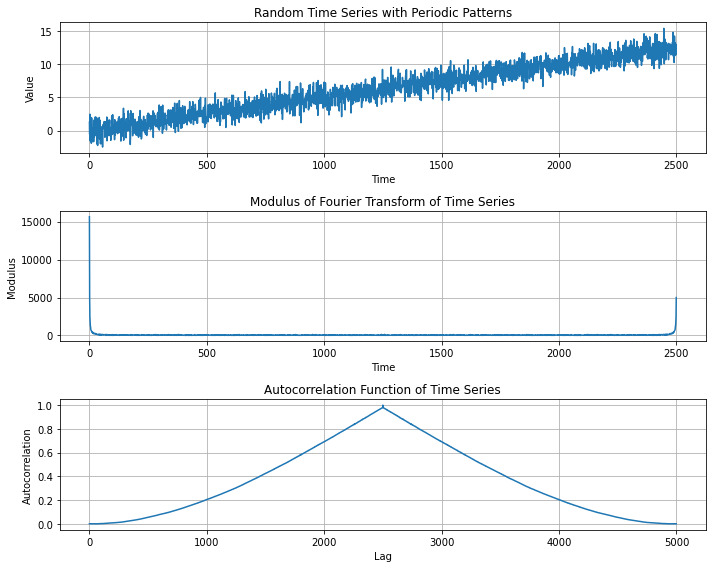

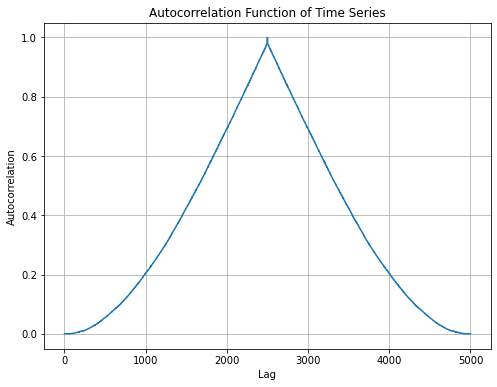

In [10]:
# Parameters
num_points = 2500 
periodic_amplitude = 0.001
noise_std = 1    
trend_slope = 0.005

time = np.arange(num_points)
periodic_component = periodic_amplitude * np.sin(2 * np.pi * time / 20)
trend_component = trend_slope * time
noise = np.random.normal(0, noise_std, num_points)
time_series = periodic_component + trend_component + noise

fourier_transform = np.fft.fft(time_series)
modulus = np.abs(fourier_transform)
frequencies = np.fft.fftfreq(num_points)

# Compute the autocorrelation function
autocorrelation = np.correlate(time_series, time_series, mode='full') / np.sum(time_series ** 2)

# Plot the original time series
plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
plt.plot(time, time_series, label='Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Random Time Series with Periodic Patterns')
plt.grid(True)

# Plot the Fourier Transform magnitude
plt.subplot(3, 1, 2)
plt.plot(time, modulus)
plt.xlabel('Time')
plt.ylabel('Modulus')
plt.title('Modulus of Fourier Transform of Time Series')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(np.arange(0, 4999), autocorrelation)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function of Time Series')
plt.grid(True)

plt.tight_layout()
plt.show()


# Compute the autocorrelation function
autocorrelation = np.correlate(time_series, time_series, mode='full') / np.sum(time_series ** 2)

# Plot the first 100 values of the autocorrelation function
plt.figure(figsize=(8, 6))
plt.plot(np.arange(0, 4999), autocorrelation)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function of Time Series')
plt.grid(True)
plt.show()